In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
content = pd.read_csv('/kaggle/input/a360-internship-practice/Content.csv')
Reactions = pd.read_csv('/kaggle/input/a360-internship-practice/Reactions.csv')
Reactiontypes = pd.read_csv('/kaggle/input/a360-internship-practice/ReactionTypes.csv')

# Cleaning and Polishing Content DATASET

In [4]:
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [5]:
content.shape

(1000, 6)

# Shape, Null_values and Duplicates 

Null/ NaN:
In pandas, the isnull().sum() combination of methods is used to count the number of missing (null or NaN) values in each column of a DataFrame. It's a convenient way to quickly assess the amount of missing data in your dataset.

isnull(): This method is used to create a Boolean mask that identifies missing values in a DataFrame. It returns a DataFrame of the same shape as the original, where each element is True if the corresponding element in the original DataFrame is missing (NaN), and False otherwise.

sum(): After applying isnull(), you can use the sum() method on the resulting Boolean DataFrame. This method sums the True values (which represent missing values) along each column, effectively counting the number of missing values in each column.

Datatypes: 
The dtypes attribute in pandas is used to determine the data type of each column in a DataFrame. It provides information about the data type of the values stored in each column, which is important for understanding and working with your data, especially during the Exploratory Data Analysis (EDA) phase.

Duplicates:

The .duplicated().sum() combination of methods in pandas is used to count the number of duplicate rows in a DataFrame. It allows you to identify and quantify duplicate rows based on the values in all columns or a specific subset of columns.

Here's how it works:

.duplicated(): This method returns a Boolean Series that indicates whether each row is a duplicate of a previous row. It marks duplicate rows as True and non-duplicate rows as False.

.sum(): After applying .duplicated(), you can use the .sum() method on the resulting Boolean Series to count the number of True values, which correspond to duplicate rows.


In [6]:
#reviewing the shape, nulls and duplicates for conent df

print (content.isnull().sum())
print(content.dtypes)
print(content.duplicated().sum())


Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64
Unnamed: 0     int64
Content ID    object
User ID       object
Type          object
Category      object
URL           object
dtype: object
0


In [7]:
content = content.drop(columns=['Unnamed: 0','URL'])


In [8]:
content.head()

,Content ID,User ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food


In [9]:
content = content.rename(columns={'Type':'Content Type'})

In [10]:
content['Category'] = content['Category'].str.replace('"','').str.capitalize()

In [11]:
content.head(10)

,Content ID,User ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,Healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,Healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,Technology
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,Food
5,cf1e8c1a-23eb-4426-9f58-002fb1b53e91,4607d7b0-3313-49b8-9f73-5b8227fc5b67,GIF,Cooking
6,3f8590c7-6ab2-4973-805a-90cdec355f05,ae600af5-c1f0-4b1f-adb0-1b4c246373e4,video,Dogs
7,e5490118-90d5-4572-ab1c-1fbc87b8d9ca,583f2bde-886d-4cf3-a5c4-7cb60cd25df3,video,Technology
8,0bedca96-fb76-4287-a83c-17330ed39cce,2bd9c167-e06c-47c1-a978-3403d6724606,photo,Soccer
9,b18cb63f-4c8e-44ee-a47f-541e95191d11,13f0db8a-152a-496f-a6e8-1ed6a90b8788,photo,Public speaking


# Cleaning and Polishing Reactions Dataset

In [12]:
Reactions.head(10)

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58
6,6,97522e57-d9ab-4bd6-97bf-c24d952602d2,7918d465-0953-4f20-9e28-539e74c82e2f,peeking,2020-12-07 06:27:54
7,7,97522e57-d9ab-4bd6-97bf-c24d952602d2,fa3e42f0-71d8-455f-b024-e52d5c27a145,cherish,2021-04-11 17:35:49
8,8,97522e57-d9ab-4bd6-97bf-c24d952602d2,b0c22f82-b882-4394-bf27-6dfadf26e5c2,hate,2021-01-27 08:32:09
9,9,97522e57-d9ab-4bd6-97bf-c24d952602d2,1932a904-86ba-4438-bb52-b7e6516a4019,peeking,2021-04-01 22:54:23


In [13]:
print(Reactions.isnull().sum())
print(Reactions.dtypes)
print(Reactions.duplicated().sum())

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64
Unnamed: 0     int64
Content ID    object
User ID       object
Type          object
Datetime      object
dtype: object
0


In [14]:
#Remove unwanted columns
Reactions = Reactions.drop(columns=['Unnamed: 0', 'User ID'])

#Rename columns for clarity
Reactions =  Reactions.rename(columns={'Type' : 'Reaction Type'})

In [15]:
Reactions.head(10)

,Content ID,Reaction Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58
6,97522e57-d9ab-4bd6-97bf-c24d952602d2,peeking,2020-12-07 06:27:54
7,97522e57-d9ab-4bd6-97bf-c24d952602d2,cherish,2021-04-11 17:35:49
8,97522e57-d9ab-4bd6-97bf-c24d952602d2,hate,2021-01-27 08:32:09
9,97522e57-d9ab-4bd6-97bf-c24d952602d2,peeking,2021-04-01 22:54:23


# Dropping Null Values
Since there are null values in Reactions dataframe, we need to drop NaN values. For that we need to remove rows with missing values.
*dropna()*

In [16]:
Reactions.dropna()

,Content ID,Reaction Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58
...,...,...,...
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02
25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31


In [17]:
print(Reactions)

                                 Content ID Reaction Type             Datetime
0      97522e57-d9ab-4bd6-97bf-c24d952602d2           NaN  2021-04-22 15:17:15
1      97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust  2020-11-07 09:43:50
2      97522e57-d9ab-4bd6-97bf-c24d952602d2       dislike  2021-06-17 12:22:51
3      97522e57-d9ab-4bd6-97bf-c24d952602d2        scared  2021-04-18 05:13:58
4      97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust  2021-01-06 19:13:01
...                                     ...           ...                  ...
25548  75d6b589-7fae-4a6d-b0d0-752845150e56       dislike  2020-06-27 09:46:48
25549  75d6b589-7fae-4a6d-b0d0-752845150e56     intrigued  2021-02-16 17:17:02
25550  75d6b589-7fae-4a6d-b0d0-752845150e56    interested  2020-09-12 03:54:58
25551  75d6b589-7fae-4a6d-b0d0-752845150e56       worried  2020-11-04 20:08:31
25552  75d6b589-7fae-4a6d-b0d0-752845150e56       cherish  2021-01-04 04:55:11

[25553 rows x 3 columns]


In [18]:
Reactions=Reactions.dropna()

In [19]:
Reactions.head()

,Content ID,Reaction Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


# Cleaning and Polishing ReactionTypes Dataset

In [20]:
Reactiontypes.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [21]:
print(Reactiontypes.shape)
print(Reactiontypes.isnull().sum())
print(Reactiontypes.dtypes)
print(Reactiontypes.duplicated().sum())

(16, 4)
Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64
Unnamed: 0     int64
Type          object
Sentiment     object
Score          int64
dtype: object
0


In [22]:
#Removing the unwanted columns
Reactiontypes = Reactiontypes.drop(columns=['Unnamed: 0'])

#renaming column names for claryfication
Reactiontypes = Reactiontypes.rename(columns={'Type': 'Reaction Type'})

In [23]:
Reactiontypes.head()

,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


# Merging the three dataframes into one
In the code you provided, on is a parameter used in the pd.merge() function to specify the column or columns on which you want to merge two DataFrames.

Here's what it signifies:

on: This parameter specifies the column(s) that serve as the key or common identifier for merging the two DataFrames. When you set on to a column name or a list of column names, the merge function uses those columns as the matching criteria to align rows between the two DataFrames. In other words, it's the column that both DataFrames share and use to combine data.

For example: one_df= pd.concat('content','Reactions', on='Content_ID')

You are merging two DataFrames, Reactions_df and Content_df, based on the column named 'Content ID'. This means that rows with the same 'Content ID' values in both DataFrames will be combined into a single row in the Content_merged DataFrame. The 'Content ID' column is acting as the key or identifier for this merge operation.

In [24]:
one_df= pd.merge(content, Reactions, on='Content ID')
Merged_df= pd.merge(one_df, Reactiontypes, on='Reaction Type')


In [25]:
Merged_df.head()

,Content ID,User ID,Content Type,Category,Reaction Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,Healthy eating,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,Healthy eating,disgust,2020-08-04 05:40:33,negative,0


# Now making a new dataframe to store the top categoreis with scores

The code you provided is performing a grouping and aggregation operation using the groupby() method in pandas. Let's break down the code step by step:

category_score = Merged_df.groupby('Category')['Score'].sum()
Merged_df: This is assumed to be a DataFrame containing your data.

.groupby('Category'): This part of the code groups the rows in the DataFrame Merged_df based on the values in the 'Category' column. In simple terms, it's creating groups where each group corresponds to a unique category in the 'Category' column.

['Score']: After grouping by 'Category', this part specifies that you want to work with the 'Score' column for the aggregation. In other words, you are interested in summing the 'Score' values within each category group.

.sum(): Finally, you are applying the sum() function to each group of 'Score' values within each category. This will calculate the sum of scores for each category.

The result, category_score, is a pandas Series or DataFrame (depending on the structure of your original data) that shows the total sum of scores for each unique category in the 'Category' column of your original data. Each category is used as an index, and the corresponding value represents the sum of scores for that category.

In [26]:
category_score = Merged_df.groupby('Category')['Score'].sum()
print(category_score)

Category
Animals            74965
Cooking            64756
Culture            66579
Dogs               52511
Education          57436
Fitness            55323
Food               66676
Healthy eating     69339
Public speaking    49264
Science            71168
Soccer             57783
Studying           54269
Technology         68738
Tennis             50339
Travel             64880
Veganism           49619
Name: Score, dtype: int64


**Sorting the top five scores in descending order**

In [27]:
top_categories = category_score.sort_values(ascending=False)[:5]
print(top_categories)

Category
Animals           74965
Science           71168
Healthy eating    69339
Technology        68738
Food              66676
Name: Score, dtype: int64


In [28]:
Top_five = pd.DataFrame({'Category':top_categories.index, 'Score':top_categories.values})
print(Top_five)

         Category  Score
0         Animals  74965
1         Science  71168
2  Healthy eating  69339
3      Technology  68738
4            Food  66676


# Converting the dataframes to xlsx files

In [29]:
with pd.ExcelWriter('data_final.xlsx') as writer:
    Merged_df.to_excel(writer, sheet_name='Merged Datasets')
    Top_five.to_excel(writer, sheet_name='Top five Categories')

In [30]:
# Specify the file path where you want to save the CSV file
file_path = 'Merged_df.csv'

# Use the to_csv() method to save the DataFrame as a CSV file
Merged_df.to_csv(file_path, index=False)  # Set index=False to exclude the index column

print(f"DataFrame has been saved as '{file_path}'.")

DataFrame has been saved as 'Merged_df.csv'.


In [31]:
# Specify the file path where you want to save the CSV file
file_path = 'Top_five.csv'

# Use the to_csv() method to save the DataFrame as a CSV file
Top_five.to_csv(file_path, index=False)  # Set index=False to exclude the index column

print(f"DataFrame has been saved as '{file_path}'.")

DataFrame has been saved as 'Top_five.csv'.


In [32]:
Merged_df.head(10)

,Content ID,User ID,Content Type,Category,Reaction Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,Healthy eating,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,Healthy eating,disgust,2020-08-04 05:40:33,negative,0
5,3f8590c7-6ab2-4973-805a-90cdec355f05,ae600af5-c1f0-4b1f-adb0-1b4c246373e4,video,Dogs,disgust,2021-01-14 07:21:32,negative,0
6,3f8590c7-6ab2-4973-805a-90cdec355f05,ae600af5-c1f0-4b1f-adb0-1b4c246373e4,video,Dogs,disgust,2021-01-13 23:35:56,negative,0
7,3f8590c7-6ab2-4973-805a-90cdec355f05,ae600af5-c1f0-4b1f-adb0-1b4c246373e4,video,Dogs,disgust,2021-02-11 20:10:20,negative,0
8,b18cb63f-4c8e-44ee-a47f-541e95191d11,13f0db8a-152a-496f-a6e8-1ed6a90b8788,photo,Public speaking,disgust,2021-05-27 01:44:22,negative,0
9,b18cb63f-4c8e-44ee-a47f-541e95191d11,13f0db8a-152a-496f-a6e8-1ed6a90b8788,photo,Public speaking,disgust,2021-02-13 04:14:45,negative,0


In [33]:
Merged_df= Merged_df.drop(columns=['User ID'])

In [34]:
Merged_df

,Content ID,Content Type,Category,Reaction Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,Healthy eating,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,Healthy eating,disgust,2020-08-04 05:40:33,negative,0
...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,Veganism,adore,2020-10-04 22:26:33,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,Veganism,adore,2020-09-18 10:50:50,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,Culture,adore,2020-10-31 03:58:44,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,Culture,adore,2020-06-25 15:12:29,positive,72


In [35]:
Merged_df.isnull().sum()

Content ID       0
Content Type     0
Category         0
Reaction Type    0
Datetime         0
Sentiment        0
Score            0
dtype: int64

In [36]:
Merged_df.duplicated().sum()

0

In [37]:
Merged_df.shape

(24573, 7)

In [38]:
Merged_df.dropna()

,Content ID,Content Type,Category,Reaction Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,Healthy eating,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,Healthy eating,disgust,2020-08-04 05:40:33,negative,0
...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,Veganism,adore,2020-10-04 22:26:33,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,Veganism,adore,2020-09-18 10:50:50,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,Culture,adore,2020-10-31 03:58:44,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,Culture,adore,2020-06-25 15:12:29,positive,72


In [39]:
with pd.ExcelWriter('finaldataset.xlsx') as writer:
    Merged_df.to_excel(writer, sheet_name='Merged Datasets')
    Top_five.to_excel(writer, sheet_name='Top five Categories')

# Visualization and Analysis

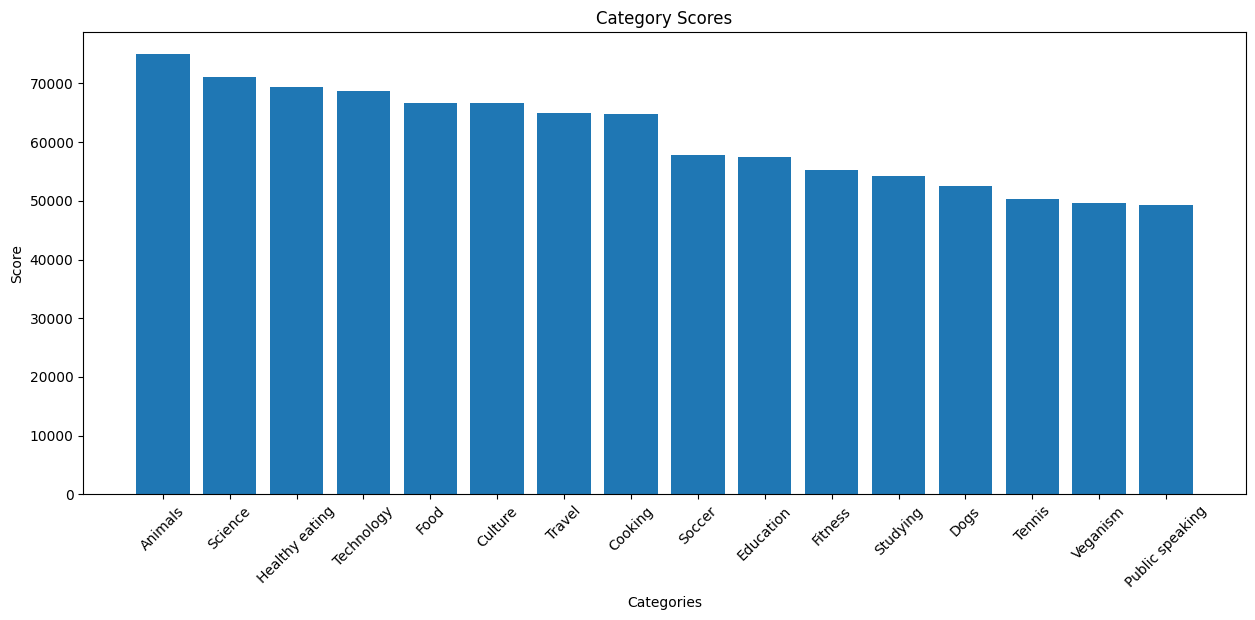

In [40]:
sorted_categories = category_score.sort_values(ascending=False)
#colors = ['tomato', 'darkorange', 'gold', 'green', 'darkturquoise','mediumorchid']
fig, ax = plt.subplots(figsize=(15,6))

ax.bar(sorted_categories.index, sorted_categories)
ax.set_title('Category Scores')
ax.set_xlabel('Categories')
ax.set_ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Average Scores at different hours of the day. 

# Line Chart with highlighed peak

In [41]:
# Convert the "Datetime" column to a datetime object
Merged_df['Datetime'] = pd.to_datetime(Merged_df['Datetime'], format='%Y-%m-%d %H:%M:%S')

# average score per hour
hourly_scores = Merged_df.groupby(Merged_df['Datetime'].dt.hour)['Score'].mean()

# Find peak hours
peak_hours = hourly_scores[hourly_scores > hourly_scores.mean()].index

#average Scores
avg_score = hourly_scores.mean()




In [42]:
print (peak_hours)

Index([2, 4, 5, 10, 11, 12, 13, 15, 16, 17, 18, 19, 21, 23], dtype='int32', name='Datetime')


In [43]:
top_peak_hours = hourly_scores.nlargest(3)

# Print the top three peak engagement hours
print("Top Three Peak Engagement Hours:")
for hour, score in top_peak_hours.items():
    print(f"Hour: {hour}, Average Score: {score:.2f}")

Top Three Peak Engagement Hours:
Hour: 17, Average Score: 40.60
Hour: 21, Average Score: 40.48
Hour: 15, Average Score: 40.18


In [66]:
import plotly.graph_objects as go

# Assuming you have already calculated 'hourly_scores', 'peak_hours', and 'avg_score' as before

# Create a list of hour labels for the x-axis
hour_labels = [f"{h}:00" for h in range(24)]

# Create a scatter trace for the peak hours
peak_trace = go.Scatter(
    x=peak_hours,
    y=[hourly_scores[hour] for hour in peak_hours],
    mode='markers',
    marker=dict(size=10, color='red'),
    text=[f"Hour: {hour}<br>Average Score: {hourly_scores[hour]:.2f}" for hour in peak_hours],
    name='Peak Hours'
)

# Create a line trace for the average score
line_trace = go.Scatter(
    x=hourly_scores.index,
    y=hourly_scores,
    mode='lines',
    line=dict(color='blue'),
    name='Average Score'
)

# Create a dashed line for the average score
avg_trace = go.Scatter(
    x=hourly_scores.index,
    y=[avg_score] * len(hourly_scores),
    mode='lines',
    line=dict(color='green', dash='dash'),
    name='Average Score (Mean)'
)

# Create the layout for the plot
layout = go.Layout(
    title='Average Scores by Hour of Day',
    xaxis=dict(
        title='Hour of Day',
        tickvals=list(range(24)),
        ticktext=hour_labels,
        tickangle=45
    ),
    yaxis=dict(title='Average Score')
)

# Create the figure and add traces
fig = go.Figure(data=[peak_trace, line_trace, avg_trace], layout=layout)

# Show the plot
fig.show()


# Average Score per day of the week

In [67]:
#average scores per day of the week
daily_scores = Merged_df.groupby(Merged_df['Datetime'].dt.dayofweek)['Score'].mean()

#peak days
peak_days= daily_scores[daily_scores>daily_scores.mean()].index

#average Scores
avg_score = daily_scores.mean()

#create a list for the day labels i.e. x-axis

day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#create a scatter trace for peak days

peak_trace = go.Scatter(
    x= peak_days,
    y= [daily_scores[day] for day in peak_days],
    mode='markers',
    marker=dict(size=10, color='red'),
    text= [f"Day: {day}<br>Average Score : {daily_scores[day] : .2f}" for day in peak_days], 
    name= "Peak Days"
)

#Create a line trace for the average scores
line_trace = go.Scatter(
    x= daily_scores.index,
    y= daily_scores,
    mode= 'lines',
    line= dict(color='blue'),
    name= 'Average Score'
)

# Create a dashed line for the average score
avg_trace = go.Scatter(
    x=daily_scores.index,
    y=[avg_score] * len(hourly_scores),
    mode='lines',
    line=dict(color='green', dash='dash'),
    name='Average Score (Mean)'
)

# Create the layout for the plot
layout = go.Layout(
    title='Average Scores by Day of the week',
    xaxis=dict(
        title='Day of the week',
        tickvals=list(range(7)),
        ticktext=day_labels,
        tickangle=45
    ),
    yaxis=dict(title='Average Score')
)

# Create the figure and add traces
fig = go.Figure(data=[peak_trace, line_trace, avg_trace], layout=layout)

# Show the plot
fig.show()



In [68]:
# Find the top 3 peak days
top_peak_days = daily_scores.nlargest(3)

In [69]:
print("Top Three Peak Engagement Days:")
for day in top_peak_days.index:
    print(f"Day: {day_labels[day]}, Average Score: {top_peak_days[day]:.2f}")

Top Three Peak Engagement Days:
Day: Thursday, Average Score: 40.49
Day: Sunday, Average Score: 40.14
Day: Friday, Average Score: 40.10


# Content Type Percentages using pie chart

In [70]:
import plotly.express as px

#Count the number of content types
type_counts = Merged_df.groupby('Content Type').size()

# Create an interactive pie chart using Plotly Express
fig = px.pie(
    names=type_counts.index, 
    values=type_counts.values,
    title='Content Type Percentages', 
    hole=0.6,
    labels={'names': 'Content Type'}
)

# Customize the layout to adjust size (width and height)
fig.update_layout(
    showlegend=True,
    width=600,  # Adjust the width as needed
    height=400  # Adjust the height as needed
)

# Customize textinfo using update_traces
fig.update_traces(textinfo='percent+label')

# Show the plot
fig.show()

In [49]:
type_counts.sort_values(ascending=False)

Content Type
photo    6589
video    6245
GIF      6079
audio    5660
dtype: int64

# Number of Content Items by Categories

In [50]:
categories = Merged_df['Category'].nunique()
categories

16

In [51]:
category_counts= Merged_df['Category'].value_counts()
category_counts

Category
Animals            1897
Science            1796
Healthy eating     1717
Food               1699
Technology         1698
Culture            1676
Cooking            1664
Travel             1647
Soccer             1457
Education          1433
Fitness            1395
Studying           1363
Dogs               1338
Tennis             1328
Veganism           1248
Public speaking    1217
Name: count, dtype: int64

In [52]:
# Create an interactive bar plot using Plotly Express
fig = px.bar(
    x=category_counts.index,  # Use the index as x-values (category names)
    y=category_counts.values,  # Use values as y-values (count values)
    title='Number of Content Items by Category',
    labels={'x': 'Category', 'y': 'Number of Content Items'},
    text=category_counts.values,  # Display count values on bars
)

# Customize the layout (optional)
fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Number of Content Items',
    xaxis=dict(tickangle=45),
    showlegend=False
)

# Show the plot
fig.show()

In [53]:
Merged_df['Month'] = Merged_df['Datetime'].dt.month

In [71]:
import calendar
#month with the most posts
month_with_most_posts = Merged_df['Month'].value_counts().idxmax()

#converting the output which will be an integer to the name of the month.
month_name = calendar.month_name[month_with_most_posts]
print(f"The month with the most posts is: {month_name}")


The month with the most posts is: May


In [72]:
monthly_posts = Merged_df.groupby('Month')['Content ID'].count()

# Calculate the average posts per month
avg_posts = monthly_posts.mean()

# Define month labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a line chart using Plotly
fig = go.Figure()

# Add a trace for the monthly posts
fig.add_trace(go.Scatter(
    x=monthly_posts.index,
    y=monthly_posts,
    mode='lines',
    line=dict(color='blue'),
    name='Monthly Posts'
))

# Add a horizontal dashed line for the average posts
fig.add_shape(
    type='line',
    x0=monthly_posts.index[0],
    x1=monthly_posts.index[-1],
    y0=avg_posts,
    y1=avg_posts,
    line=dict(color='red', dash='dash'),
    name='Average Posts'
)

# Find and highlight peak months
peak_months = monthly_posts[monthly_posts == monthly_posts.max()].index.tolist()
fig.add_trace(go.Scatter(
    x=peak_months,
    y=[monthly_posts[i] for i in peak_months],
    mode='markers',
    marker=dict(color='red', size=10),
    name='Peak Activity'
))

# Customize the layout
fig.update_layout(
    xaxis=dict(
        title='Month',
        tickvals=list(range(1, 13)),
        ticktext=month_labels
    ),
    yaxis=dict(title='Count of Posts'),
    title='Average Scores per Month of the Year',
    showlegend=True
    
)

# Show the plot
fig.show()

In [73]:
top_peak_months = monthly_posts.nlargest(3)

In [74]:
# Print the top 3 peak months
print("Top Three Peak Months:")
for month in top_peak_months.index:
    print(f"Month: {calendar.month_name[month]}, Total Posts: {top_peak_months[month]}")

Top Three Peak Months:
Month: May, Total Posts: 2138
Month: January, Total Posts: 2126
Month: August, Total Posts: 2114


In [58]:
Merged_df.head()


,Content ID,Content Type,Category,Reaction Type,Datetime,Sentiment,Score,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0,11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0,1
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-04-09 02:46:20,negative,0,4
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,Healthy eating,disgust,2021-03-28 21:15:26,negative,0,3
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,Healthy eating,disgust,2020-08-04 05:40:33,negative,0,8


In [59]:
# Extract the year from the 'Datetime' column
Merged_df['Year'] = Merged_df['Datetime'].dt.year

# Now, you can count the number of contents uploaded in a specific year (e.g., 2023)
year_to_count = Merged_df['Year'[::]]  # Change this to the desired year
total_contents_in_year = len(Merged_df[Merged_df['Year'] == year_to_count])

# Print the total number of contents uploaded in the specified year
print(f"Total contents uploaded in {year_to_count}: {total_contents_in_year}")


Total contents uploaded in 0        2020
1        2021
2        2021
3        2021
4        2020
         ... 
24568    2020
24569    2020
24570    2020
24571    2020
24572    2020
Name: Year, Length: 24573, dtype: int32: 24573


# Insights :
1. In our dataset, which consists of content across 16 different categories, we've uncovered some significant insights.  Our content portfolio encompasses a wide array of content categories, each with its unique appeal and significance.
2. Among these categories, we observe a range of topics that resonate strongly with our audience. Notably, the top 5 content categories that have garnered the most attention and engagement are Animals, Science, Healthy Eating, Technology, and Food. These categories appear to resonate strongly with our audience and have generated substantial interest.
3. With a substantial count of 1897 content items, the Animals category stands at the forefront, showcasing its remarkable popularity and the strong affinity our audience holds for content related to the natural world and animal kingdom.
4. In our analysis, we've identified a diverse range of content types, including photos, videos, audios, and gifs. Among these, photos emerge as the dominant content type, comprising 26.8% of the total content volume. This is closely followed by videos at 25.4%, while audios and gifs contribute 23% and 24.7%, respectively. 
5. In our analysis, May stands out as the month with the highest volume of posts making it a pivotal month in our data timeline.
6. Thursdays, Fridays, and Sundays emerge as the peak engagement days, offering prime opportunities for content impact.
7. Peak engagement hours at 15:00, 17:00, and 21:00 signify optimal windows for content delivery and interaction, strategically capitalizing on user enthusiasm throughout the day.

In [60]:
import plotly.express as px

# Sample data (replace with your actual data)
categories = ['Animals', 'Science', 'Healthy Eating', 'Technology', 'Food']
content_counts = [1897, 1796, 1717, 1698, 1699]

# Create a DataFrame from the data
data = {'Category': categories, 'Content Count': content_counts}
df = pd.DataFrame(data)

# Define a custom color palette
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # You can specify your own colors here

# Create an interactive pie chart with custom colors
fig = px.pie(df, names='Category', values='Content Count', title='Top 5 Content Categories', hole=0.6, color_discrete_sequence=custom_colors)
fig.update_traces(textinfo='percent+label')

# Show the chart
fig.show()


In [61]:
Merged_df.head(1000)

,Content ID,Content Type,Category,Reaction Type,Datetime,Sentiment,Score,Month,Year
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0,11,2020
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0,1,2021
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-04-09 02:46:20,negative,0,4,2021
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,Healthy eating,disgust,2021-03-28 21:15:26,negative,0,3,2021
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,Healthy eating,disgust,2020-08-04 05:40:33,negative,0,8,2020
...,...,...,...,...,...,...,...,...,...
995,0c91753a-0bb4-4b77-a919-96c2f998ad91,GIF,Fitness,disgust,2020-12-08 14:07:32,negative,0,12,2020
996,fd0a3090-6b89-4c4e-9192-1aa4db213a3e,GIF,Cooking,disgust,2021-02-16 05:16:50,negative,0,2,2021
997,9a25d0c6-1134-41d2-abc4-e893c41363bc,video,Science,disgust,2020-12-04 02:56:44,negative,0,12,2020
998,9a25d0c6-1134-41d2-abc4-e893c41363bc,video,Science,disgust,2020-08-11 03:14:42,negative,0,8,2020


In [62]:
print(Merged_df['Sentiment'].unique())

['negative' 'positive' 'neutral']


In [63]:
sentiment_mapping = {'negative': -1, 'positive': 1, 'neutral': 0}
Merged_df['Sentiment'] = Merged_df['Sentiment'].map(sentiment_mapping)

In [64]:
Merged_df.head()

,Content ID,Content Type,Category,Reaction Type,Datetime,Sentiment,Score,Month,Year
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,-1,0,11,2020
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,-1,0,1,2021
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-04-09 02:46:20,-1,0,4,2021
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,Healthy eating,disgust,2021-03-28 21:15:26,-1,0,3,2021
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,Healthy eating,disgust,2020-08-04 05:40:33,-1,0,8,2020


In [ ]:
print(sentiment_counts)

In [75]:
# Group the data by 'Category' and 'Sentiment' and count occurrences
sentiment_counts = Merged_df.groupby(['Category', 'Sentiment']).size().reset_index(name='Count')

# Create a custom color map for sentiment categories
color_map = {'positive': '#90EE90', 'negative': '#FF0000', 'neutral': '#ADD8E6'}

# Create a stacked bar chart using Plotly Express
fig = px.bar(sentiment_counts, x='Category', y='Count', color='Sentiment',
             title='Sentiment Distribution by Content Category',
             color_discrete_map=color_map)

# Customize the layout (optional)
fig.update_xaxes(title='Content Category')
fig.update_yaxes(title='Count')
fig.update_traces(marker_line_width=0, opacity=0.8)  # Customize appearance

# Show the interactive plot
fig.show()


In [76]:
# Group the sentiment_counts DataFrame by 'Category' and calculate the total count
total_counts_per_category = sentiment_counts.groupby('Category')['Count'].sum().reset_index()

# Print the total counts per category
print(total_counts_per_category)



           Category  Count
0           Animals   1897
1           Cooking   1664
2           Culture   1676
3              Dogs   1338
4         Education   1433
5           Fitness   1395
6              Food   1699
7    Healthy eating   1717
8   Public speaking   1217
9           Science   1796
10           Soccer   1457
11         Studying   1363
12       Technology   1698
13           Tennis   1328
14           Travel   1647
15         Veganism   1248


In [77]:
import pandas as pd

# Filter the sentiment_counts DataFrame for positive sentiment
positive_sentiment_counts = sentiment_counts[sentiment_counts['Sentiment'] == 'positive']
positive_sentiment_counts = positive_sentiment_counts[['Category', 'Count']]
positive_sentiment_counts = positive_sentiment_counts.rename(columns={'Count': 'Positive Count'})

# Filter the sentiment_counts DataFrame for neutral sentiment
neutral_sentiment_counts = sentiment_counts[sentiment_counts['Sentiment'] == 'neutral']
neutral_sentiment_counts = neutral_sentiment_counts[['Category', 'Count']]
neutral_sentiment_counts = neutral_sentiment_counts.rename(columns={'Count': 'Neutral Count'})

# Filter the sentiment_counts DataFrame for negative sentiment
negative_sentiment_counts = sentiment_counts[sentiment_counts['Sentiment'] == 'negative']
negative_sentiment_counts = negative_sentiment_counts[['Category', 'Count']]
negative_sentiment_counts = negative_sentiment_counts.rename(columns={'Count': 'Negative Count'})

# Merge the three DataFrames based on the 'Category' column
combined_sentiment_counts = pd.merge(positive_sentiment_counts, neutral_sentiment_counts, on='Category', how='outer')
combined_sentiment_counts = pd.merge(combined_sentiment_counts, negative_sentiment_counts, on='Category', how='outer')

# Fill NaN values with 0
combined_sentiment_counts = combined_sentiment_counts.fillna(0)

# Print the combined sentiment counts table
print("Combined Sentiment Counts:")
print(combined_sentiment_counts)


Combined Sentiment Counts:
Empty DataFrame
Columns: [Positive Count, Neutral Count, Category, Negative Count]
Index: []


In [78]:

# Group the data by 'Content Type' and 'Sentiment' and count occurrences
sentiment_counts = Merged_df.groupby(['Content Type', 'Sentiment']).size().reset_index(name='Count')

# Create a custom color map for sentiment categories
color_map = {'positive': '#8BC34A', 'negative': '#FF5722', 'neutral': '#757575'}

# Create a stacked bar chart using Plotly Express with custom colors
fig = px.bar(sentiment_counts, x='Content Type', y='Count', color='Sentiment',
             title='Sentiment Distribution by Content Type',
             color_discrete_map=color_map)  # Specify custom colors

# Customize the layout (optional)
fig.update_xaxes(title='Content Type')
fig.update_yaxes(title='Count')
fig.update_traces(marker_line_width=0, opacity=0.8)  # Customize appearance

# Show the interactive plot
fig.show()


In [79]:
# Group the data by 'Content Type' and sum the 'Count' column to get the total counts per Content Type
total_counts_per_content_type = sentiment_counts.groupby('Content Type')['Count'].sum().reset_index()

# Print the total counts per Content Type
print(total_counts_per_content_type)


  Content Type  Count
0          GIF   6079
1        audio   5660
2        photo   6589
3        video   6245


In [81]:
# Pivot the 'sentiment_counts' DataFrame to have separate columns for positive, neutral, and negative sentiments
pivot_sentiments = sentiment_counts.pivot(index='Content Type', columns='Sentiment', values='Count').reset_index()

# Rename the columns for clarity
pivot_sentiments.columns = ['Content Type', 'Negative', 'Neutral', 'Positive']

# Print the pivot table
print(pivot_sentiments)


  Content Type  Negative  Neutral  Positive
0          GIF      1924      774      3381
1        audio      1771      673      3216
2        photo      2057      832      3700
3        video      1943      792      3510


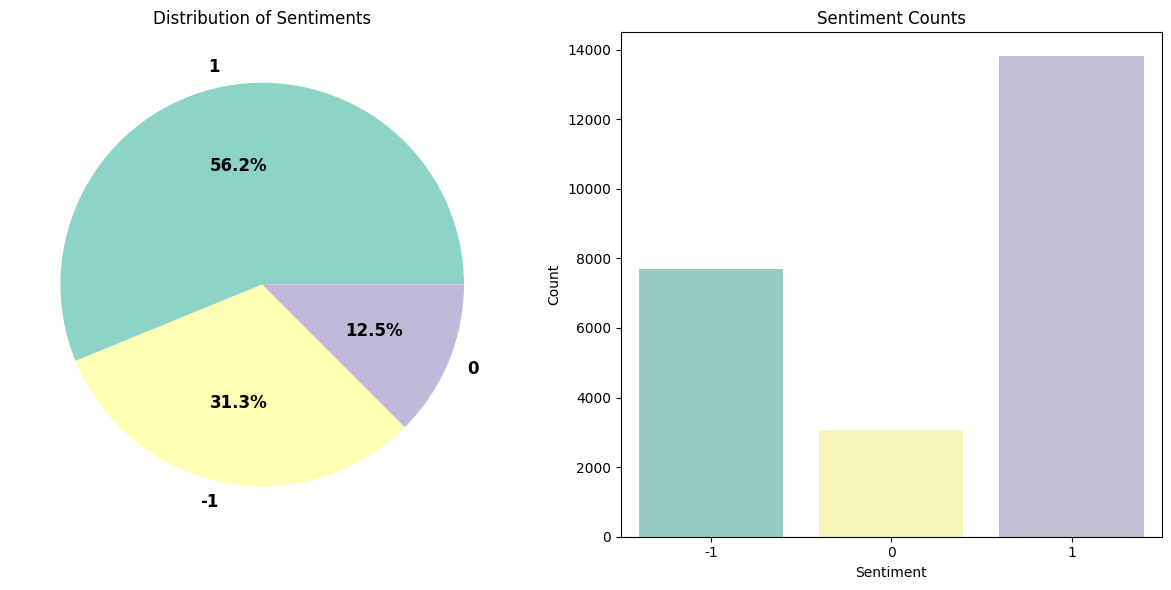

In [82]:
# Group the data by 'Sentiment' and count occurrences
sentiment_counts = Merged_df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a pie chart in the first subplot
wedges, texts, autotexts = ax1.pie(sentiment_counts['Count'], labels=sentiment_counts['Sentiment'], autopct='%1.1f%%',
         colors=sns.color_palette('Set3', len(sentiment_counts)))
ax1.set_title('Distribution of Sentiments')

# Create a bar plot in the second subplot
sns.barplot(x='Sentiment', y='Count', data=sentiment_counts, ax=ax2, palette='Set3')
ax2.set_title('Sentiment Counts')

# Add labels to the pie chart
for text, autotext in zip(texts, autotexts):
    text.set(size=12, weight="bold")
    autotext.set(size=12, weight="bold")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [83]:
import plotly.express as px
import plotly.graph_objects as go

# Assuming you have already calculated 'sentiment_counts' as described in your code

# Create a pie chart
fig = px.pie(sentiment_counts, values='Count', names='Sentiment',
             title='Distribution of Sentiments',
             color_discrete_sequence=px.colors.qualitative.Set3)

# Customize the pie chart
fig.update_traces(textinfo='percent+label')
fig.update_layout(showlegend=True)  # Show legend

fig.update_layout(title_x=0.5)

# Create a bar chart
bar_fig = px.bar(sentiment_counts, x='Sentiment', y='Count',
                  title='Sentiment Counts',
                  color='Sentiment', color_discrete_sequence=px.colors.qualitative.Set3)

# Customize the bar chart
bar_fig.update_layout(showlegend=True)  # Show legend

# Show both charts side by side
fig.show()
bar_fig.show()


In [ ]:
Merged_df.head()

In [84]:
# Assuming you have the sentiment_counts DataFrame with columns 'Sentiment' and 'Count'
total_counts = sentiment_counts['Count'].sum()

# Calculate the overall percentage for each sentiment category
positive_percentage = (sentiment_counts[sentiment_counts['Sentiment'] == 'positive']['Count'].sum() / total_counts) * 100
negative_percentage = (sentiment_counts[sentiment_counts['Sentiment'] == 'negative']['Count'].sum() / total_counts) * 100
neutral_percentage = (sentiment_counts[sentiment_counts['Sentiment'] == 'neutral']['Count'].sum() / total_counts) * 100

# Print the overall percentages
print(f"Overall Positive Percentage: {positive_percentage:.2f}%")
print(f"Overall Negative Percentage: {negative_percentage:.2f}%")
print(f"Overall Neutral Percentage: {neutral_percentage:.2f}%")


Overall Positive Percentage: 0.00%
Overall Negative Percentage: 0.00%
Overall Neutral Percentage: 0.00%


# User Engagement Summary:

1. Almost each post has a good count of positive sentiment which suggests that people aren't being rude to the content they see.
2. If we look over the overall sentiment or user engagement in the posts, the positive sentiments come on top, with negative being the second and neutral playing a small part in it. But the good part is that majority of the people are engaging positivly with the posts that are on the platform